In [11]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MultipleLocator
import calendar
import netCDF4 as nc
from cartopy import crs as ccrs
import rtree
import geopandas as gpd
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter
import csv

In [28]:
# drawing
linewidth = 0.5
linewidth2 = 1
fontsize = 9
start_year = 2015
end_year = 2100
labelcolor = '#6b6b6b'
lc1 = '#6e1913'
lc2 = '#a42018'
lc3 = '#f62d18'
lc4 = '#d97c26'
lc5 = '#ff912b'
lc6 = '#30b5d6'
lc7 = '#28ac92'
lc8 = '#123264'
lc9 = '#05101f'
minor_locator = MultipleLocator(10)
specific_years = [2015, 2050, 2100]
alpha=0.075

In [76]:
# surface
sfile = '/mnt/iusers01/fatpou01/sees01/a16404ys/scratch/Projects/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr1850_c190214.nc'
#case0
path_0 = '/mnt/iusers01/fatpou01/sees01/a16404ys/scratch/Projects/archive/fromArcher2/project1/case0/lnd_hist/'
#case1
path_1 = '/mnt/iusers01/fatpou01/sees01/a16404ys/scratch/Projects/archive/csf3/project1/RCase1/lnd_hist/'
#case2
path_2 = '/mnt/iusers01/fatpou01/sees01/a16404ys/scratch/Projects/archive/csf3/project1/RCase2/lnd_hist/'
#csv_export
path_csv = '/mnt/iusers01/fatpou01/sees01/a16404ys/scratch/output_analysis/project1/csv_export/'
# figure_export
path_fig = '/mnt/iusers01/fatpou01/sees01/a16404ys/scratch/output_analysis/project1/figure_export/'

In [5]:
ds_0 = xr.open_dataset(sfile)
mask = np.any(ds_0['PCT_URBAN'] != 0, axis=0)
mask = mask.rename({'lsmlat': 'lat', 'lsmlon': 'lon'})
mask
# xarray.DataArray'PCT_URBAN'(lat: 192lon: 288)

<xarray.DataArray 'PCT_URBAN' (lat: 192, lon: 288)>
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Dimensions without coordinates: lat, lon

# case0

In [60]:
Arr_CUHI_0 = []
Arr_CUHI_0_JJA = []
Arr_CUHI_0_DJF = []
Arr_SUHI_0 = []
Arr_SUHI_0_JJA = []
Arr_SUHI_0_DJF = []

# set 'Case2.clm2.h1.2101-02-01-00000.nc'the same as 'Case2.clm2.h1.2100-02-01-00000.nc' 
for year in range(start_year,end_year):
#for year in range(start_year,end_year-1):
        fn = 'Case0.clm2.h1.' + '%04.0f' % year + '-02-01-00000.nc'
        year_1 = year +1
        fn_1 = 'Case0.clm2.h1.' + '%04.0f' % year_1 + '-02-01-00000.nc'
        if(os.path.exists(path_0+fn)):
            #print(path_0+fn)
            ds_0 = xr.open_dataset(path_0+fn)   # 打开第一个文件
            ds_0_1 = xr.open_dataset(path_0+fn_1)
            
            Arr_CUHI_0.append((ds_0['TSA_U'].mean(dim='time').where(mask)- ds_0['TSA_R'].mean(dim='time').where(mask)).mean().item())
            Arr_CUHI_0_JJA.append((ds_0['TSA_U'][6:9,:,:].mean(dim='time').where(mask)- ds_0['TSA_R'][6:9,:,:].mean(dim='time').where(mask)).mean().item())
            Arr_CUHI_0_DJF.append((
                xr.concat([ds_0['TSA_U'].isel(time=11), ds_0['TSA_U'].isel(time=slice(0, 2))], dim='time').mean(dim='time').where(mask) -
                xr.concat([ds_0['TSA_R'].isel(time=11), ds_0['TSA_R'].isel(time=slice(0, 2))], dim='time').mean(dim='time').where(mask)).mean().item())
            
            Arr_SUHI_0.append((ds_0['TG_U'].mean(dim='time').where(mask)- ds_0['TG_R'].mean(dim='time').where(mask)).mean().item())
            Arr_SUHI_0_JJA.append((ds_0['TG_U'][6:9,:,:].mean(dim='time').where(mask)- ds_0['TG_R'][6:9,:,:].mean(dim='time').where(mask)).mean().item())

            Arr_SUHI_0_DJF.append((
                xr.concat([ds_0['TG_U'].isel(time=11), ds_0['TG_U'].isel(time=slice(0, 2))], dim='time').mean(dim='time').where(mask)-
                xr.concat([ds_0['TG_R'].isel(time=11), ds_0['TG_R'].isel(time=slice(0, 2))], dim='time').mean(dim='time').where(mask)).mean().item())

In [126]:
Arr_HIA_U_0 = []
Arr_APPAR_TEMP_U_0 = []
Arr_SWBGT_U_0 = []
Arr_HUMIDEX_U_0 = []
Arr_DISCOIS_U_0 = []

Arr_HIA_U_0_JJA = []
Arr_APPAR_TEMP_U_0_JJA = []
Arr_SWBGT_U_0_JJA = []
Arr_HUMIDEX_U_0_JJA = []
Arr_DISCOIS_U_0_JJA = []

Arr_HIA_U_0_DJF = []
Arr_APPAR_TEMP_U_0_DJF = []
Arr_SWBGT_U_0_DJF = []
Arr_HUMIDEX_U_0_DJF = []
Arr_DISCOIS_U_0_DJF = []

Arr_URBAN_AC_0 = []
Arr_URBAN_HEAT_0 = []
Arr_WASTEHEAT_0 = []
Arr_TBUILD_0 = []
Arr_EFLXBUILD_0 = []
Arr_AHF_0 = []

Arr_URBAN_AC_0_JJA = []
Arr_URBAN_HEAT_0_JJA = []
Arr_WASTEHEAT_0_JJA = []
Arr_TBUILD_0_JJA = []
Arr_EFLXBUILD_0_JJA = []
Arr_AHF_0_JJA = []

Arr_URBAN_AC_0_DJF = []
Arr_URBAN_HEAT_0_DJF = []
Arr_WASTEHEAT_0_DJF = []
Arr_TBUILD_0_DJF = []
Arr_EFLXBUILD_0_DJF = []
Arr_AHF_0_DJF = []

# set 'Case2.clm2.h1.2101-02-01-00000.nc'the same as 'Case2.clm2.h1.2100-02-01-00000.nc' 
for year in range(start_year,end_year):
#for year in range(start_year,end_year-1):
        fn = 'Case0.clm2.h1.' + '%04.0f' % year + '-02-01-00000.nc'
        year_1 = year +1
        fn_1 = 'Case0.clm2.h1.' + '%04.0f' % year_1 + '-02-01-00000.nc'
        if(os.path.exists(path_0+fn)):
            #print(path_0+fn)
            ds_0 = xr.open_dataset(path_0+fn)   # 打开第一个文件
            ds_0_1 = xr.open_dataset(path_0+fn_1)
            Arr_HIA_U_0_JJA.append(ds_0['HIA_U'][6:9,:,:].mean(dim='time').where(mask).mean().item())
            Arr_APPAR_TEMP_U_0_JJA.append(ds_0['APPAR_TEMP_U'][6:9,:,:].mean(dim='time').where(mask).mean().item())
            Arr_SWBGT_U_0_JJA.append(ds_0['SWBGT_U'][6:9,:,:].mean(dim='time').where(mask).mean().item())
            Arr_HUMIDEX_U_0_JJA.append(ds_0['HUMIDEX_U'][6:9,:,:].mean(dim='time').where(mask).mean().item())
            Arr_DISCOIS_U_0_JJA.append(ds_0['DISCOIS_U'][6:9,:,:].mean(dim='time').where(mask).mean().item())
            
            Arr_HIA_U_0.append(ds_0['HIA_U'].mean().item())
            Arr_APPAR_TEMP_U_0.append(ds_0['APPAR_TEMP_U'].mean().item())
            Arr_SWBGT_U_0.append(ds_0['SWBGT_U'].mean().item())
            Arr_HUMIDEX_U_0.append(ds_0['HUMIDEX_U'].mean().item())
            Arr_DISCOIS_U_0.append(ds_0['DISCOIS_U'].mean().item())
            
            Arr_URBAN_AC_0.append(ds_0['URBAN_AC'].mean(dim='time').where(mask).mean().item())
            Arr_URBAN_HEAT_0.append(ds_0['URBAN_HEAT'].mean(dim='time').where(mask).mean().item())
            Arr_WASTEHEAT_0.append(ds_0['WASTEHEAT'].mean(dim='time').where(mask).mean().item())
            Arr_TBUILD_0.append(ds_0['TBUILD'].mean().item())
            Arr_EFLXBUILD_0.append(ds_0['EFLXBUILD'].mean(dim='time').where(mask).mean().item())
            Arr_AHF_0.append((ds_0['URBAN_HEAT']+ds_0['WASTEHEAT']).mean(dim='time').where(mask).mean().item())
            
            Arr_URBAN_AC_0_JJA.append(ds_0['URBAN_AC'][6:9,:,:].mean(dim='time').where(mask).mean().item())
            Arr_URBAN_HEAT_0_JJA.append(ds_0['URBAN_HEAT'][6:9,:,:].mean(dim='time').where(mask).mean().item())
            Arr_WASTEHEAT_0_JJA.append(ds_0['WASTEHEAT'][6:9,:,:].mean(dim='time').where(mask).mean().item())
            Arr_TBUILD_0_JJA.append(ds_0['TBUILD'][6:9,:,:].mean().item())
            #Arr_EFLXBUILD_0_JJA.append(ds_0['EFLXBUILD'][6:9,:,:].mean(dim='time').where(mask).mean().item())
            Arr_AHF_0_JJA.append((ds_0['URBAN_HEAT'][6:9,:,:]+ds_0['WASTEHEAT'][6:9,:,:]).mean(dim='time').where(mask).mean().item())
            
            Arr_URBAN_AC_0_DJF.append((xr.concat([ds_0['URBAN_AC'].isel(time=11), ds_0['URBAN_AC'].isel(time=slice(0, 2))], dim='time')).mean(dim='time').where(mask).mean().item())
            Arr_URBAN_HEAT_0_DJF.append((xr.concat([ds_0['URBAN_HEAT'].isel(time=11), ds_0['URBAN_HEAT'].isel(time=slice(0, 2))], dim='time')).mean(dim='time').where(mask).mean().item())
            Arr_WASTEHEAT_0_DJF.append((xr.concat([ds_0['WASTEHEAT'].isel(time=11), ds_0['WASTEHEAT'].isel(time=slice(0, 2))], dim='time')).mean(dim='time').where(mask).mean().item())
            Arr_TBUILD_0_DJF.append((xr.concat([ds_0['TBUILD'].isel(time=11), ds_0['TBUILD'].isel(time=slice(0, 2))], dim='time')).mean(dim='time').where(mask).mean().item())
            Arr_AHF_0_DJF.append((
                xr.concat([ds_0['WASTEHEAT'].isel(time=11), ds_0['WASTEHEAT'].isel(time=slice(0, 2))], dim='time').where(mask)+
                xr.concat([ds_0['URBAN_HEAT'].isel(time=11), ds_0['URBAN_HEAT'].isel(time=slice(0, 2))], dim='time').where(mask)).mean().item())
                     

In [129]:
print(len(Arr_AHF_0_DJF))

85


# case1

In [61]:
#Arr_TSA_U_1 =[] #Urban 2m air temperature
#Arr_TSA_R_1 =[]
Arr_CUHI_1 = []
Arr_CUHI_1_JJA = []
Arr_CUHI_1_DJF = []
#Arr_TG_U_1 = []
#Arr_TG_R_1 = []
Arr_SUHI_1 = []
Arr_SUHI_1_JJA = []
Arr_SUHI_1_DJF = []

time = []
# set 'Case1.clm2.h1.2101-02-01-00000.nc'the same as 'Case1.clm2.h1.2100-02-01-00000.nc' 
for year in range(start_year,end_year):
#for year in range(start_year,end_year-1):
        fn = 'RCase1.clm2.h1.' + '%04.0f' % year + '-02-01-00000.nc'
        year_1 = year +1
        fn_1 = 'RCase1.clm2.h1.' + '%04.0f' % year_1 + '-02-01-00000.nc'
        if(os.path.exists(path_1+fn)):
            #print(path_1+fn)
            ds_1 = xr.open_dataset(path_1+fn)   # 打开第一个文件
            ds_1_1 = xr.open_dataset(path_1+fn_1)
            time.append(year)
            
            Arr_CUHI_1.append((ds_1['TSA_U'].mean(dim='time').where(mask)- ds_1['TSA_R'].mean(dim='time').where(mask)).mean().item())
            Arr_CUHI_1_JJA.append((ds_1['TSA_U'][6:9,:,:].mean(dim='time').where(mask)- ds_1['TSA_R'][6:9,:,:].mean(dim='time').where(mask)).mean().item())
            Arr_CUHI_1_DJF.append((
                xr.concat([ds_1['TSA_U'].isel(time=11), ds_1['TSA_U'].isel(time=slice(0, 2))], dim='time').mean(dim='time').where(mask) -
                xr.concat([ds_1['TSA_R'].isel(time=11), ds_1['TSA_R'].isel(time=slice(0, 2))], dim='time').mean(dim='time').where(mask)).mean().item())
            
            Arr_SUHI_1.append((ds_1['TG_U'].mean(dim='time').where(mask)- ds_1['TG_R'].mean(dim='time').where(mask)).mean().item())
            Arr_SUHI_1_JJA.append((ds_1['TG_U'][6:9,:,:].mean(dim='time').where(mask)- ds_1['TG_R'][6:9,:,:].mean(dim='time').where(mask)).mean().item())

            Arr_SUHI_1_DJF.append((
                xr.concat([ds_1['TG_U'].isel(time=11), ds_1['TG_U'].isel(time=slice(0, 2))], dim='time').mean(dim='time').where(mask)-
                xr.concat([ds_1['TG_R'].isel(time=11), ds_1['TG_R'].isel(time=slice(0, 2))], dim='time').mean(dim='time').where(mask)).mean().item())

In [127]:
Arr_HIA_U_1 = []
Arr_APPAR_TEMP_U_1 = []
Arr_SWBGT_U_1 = []
Arr_HUMIDEX_U_1 = []
Arr_DISCOIS_U_1 = []

Arr_HIA_U_1_JJA = []
Arr_APPAR_TEMP_U_1_JJA = []
Arr_SWBGT_U_1_JJA = []
Arr_HUMIDEX_U_1_JJA = []
Arr_DISCOIS_U_1_JJA = []

Arr_URBAN_AC_1 = []
Arr_URBAN_HEAT_1 = []
Arr_WASTEHEAT_1 = []
Arr_TBUILD_1 = []
Arr_EFLXBUILD_1 = []
Arr_AHF_1 = []

Arr_URBAN_AC_1_JJA = []
Arr_URBAN_HEAT_1_JJA = []
Arr_WASTEHEAT_1_JJA = []
Arr_TBUILD_1_JJA = []
Arr_EFLXBUILD_1_JJA = []
Arr_AHF_1_JJA = []

Arr_URBAN_AC_1_DJF = []
Arr_URBAN_HEAT_1_DJF = []
Arr_WASTEHEAT_1_DJF = []
Arr_TBUILD_1_DJF = []
Arr_EFLXBUILD_1_DJF = []
Arr_AHF_1_DJF = []

for year in range(start_year,end_year):
#for year in range(start_year,end_year-1):
        fn = 'RCase1.clm2.h1.' + '%04.0f' % year + '-02-01-00000.nc'
        year_1 = year +1
        fn_1 = 'RCase1.clm2.h1.' + '%04.0f' % year_1 + '-02-01-00000.nc'
        if(os.path.exists(path_1+fn)):
            #print(path_1+fn)
            ds_1 = xr.open_dataset(path_1+fn)   # 打开第一个文件
            ds_1_1 = xr.open_dataset(path_1+fn_1)
            Arr_HIA_U_1_JJA.append(ds_1['HIA_U'][6:9,:,:].mean(dim='time').where(mask).mean().item())
            Arr_APPAR_TEMP_U_1_JJA.append(ds_1['APPAR_TEMP_U'][6:9,:,:].mean(dim='time').where(mask).mean().item())
            Arr_SWBGT_U_1_JJA.append(ds_1['SWBGT_U'][6:9,:,:].mean(dim='time').where(mask).mean().item())
            Arr_HUMIDEX_U_1_JJA.append(ds_1['HUMIDEX_U'][6:9,:,:].mean(dim='time').where(mask).mean().item())
            Arr_DISCOIS_U_1_JJA.append(ds_1['DISCOIS_U'][6:9,:,:].mean(dim='time').where(mask).mean().item())
            
            Arr_HIA_U_1.append(ds_1['HIA_U'].mean().item())
            Arr_APPAR_TEMP_U_1.append(ds_1['APPAR_TEMP_U'].mean().item())
            Arr_SWBGT_U_1.append(ds_1['SWBGT_U'].mean().item())
            Arr_HUMIDEX_U_1.append(ds_1['HUMIDEX_U'].mean().item())
            Arr_DISCOIS_U_1.append(ds_1['DISCOIS_U'].mean().item())
            
            Arr_URBAN_AC_1.append(ds_1['URBAN_AC'].mean(dim='time').where(mask).mean().item())
            Arr_URBAN_HEAT_1.append(ds_1['URBAN_HEAT'].mean(dim='time').where(mask).mean().item())
            Arr_WASTEHEAT_1.append(ds_1['WASTEHEAT'].mean(dim='time').where(mask).mean().item())
            Arr_TBUILD_1.append(ds_1['TBUILD'].mean().item())
            Arr_EFLXBUILD_1.append(ds_1['EFLXBUILD'].mean(dim='time').where(mask).mean().item())
            Arr_AHF_1.append((ds_1['URBAN_HEAT']+ds_1['WASTEHEAT']).mean(dim='time').where(mask).mean().item())
            
            Arr_URBAN_AC_1_JJA.append(ds_1['URBAN_AC'][6:9,:,:].mean(dim='time').where(mask).mean().item())
            Arr_URBAN_HEAT_1_JJA.append(ds_1['URBAN_HEAT'][6:9,:,:].mean(dim='time').where(mask).mean().item())
            Arr_WASTEHEAT_1_JJA.append(ds_1['WASTEHEAT'][6:9,:,:].mean(dim='time').where(mask).mean().item())
            Arr_TBUILD_1_JJA.append(ds_1['TBUILD'][6:9,:,:].mean().item())
            #Arr_EFLXBUILD_1_JJA.append(ds_1['EFLXBUILD'][6:9,:,:].mean(dim='time').where(mask).mean().item())
            Arr_AHF_1_JJA.append((ds_1['URBAN_HEAT'][6:9,:,:]+ds_1['WASTEHEAT'][6:9,:,:]).mean(dim='time').where(mask).mean().item())
            
            Arr_URBAN_AC_1_DJF.append((xr.concat([ds_1['URBAN_AC'].isel(time=11), ds_1['URBAN_AC'].isel(time=slice(0, 2))], dim='time')).mean(dim='time').where(mask).mean().item())
            Arr_URBAN_HEAT_1_DJF.append((xr.concat([ds_1['URBAN_HEAT'].isel(time=11), ds_1['URBAN_HEAT'].isel(time=slice(0, 2))], dim='time')).mean(dim='time').where(mask).mean().item())
            Arr_WASTEHEAT_1_DJF.append((xr.concat([ds_1['WASTEHEAT'].isel(time=11), ds_1['WASTEHEAT'].isel(time=slice(0, 2))], dim='time')).mean(dim='time').where(mask).mean().item())
            Arr_TBUILD_1_DJF.append((xr.concat([ds_1['TBUILD'].isel(time=11), ds_1['TBUILD'].isel(time=slice(0, 2))], dim='time')).mean(dim='time').where(mask).mean().item())
            Arr_AHF_1_DJF.append((
                xr.concat([ds_1['WASTEHEAT'].isel(time=11), ds_1['WASTEHEAT'].isel(time=slice(0, 2))], dim='time').where(mask)+
                xr.concat([ds_1['URBAN_HEAT'].isel(time=11), ds_1['URBAN_HEAT'].isel(time=slice(0, 2))], dim='time').where(mask)).mean().item())

In [130]:
#print(Arr_CUHI_1)
print(len(time))

85


# case2

In [62]:
Arr_CUHI_2 = []
Arr_CUHI_2_JJA = []
Arr_CUHI_2_DJF = []
Arr_SUHI_2 = []
Arr_SUHI_2_JJA = []
Arr_SUHI_2_DJF = []

# set 'Case2.clm2.h1.2101-02-01-00000.nc'the same as 'Case2.clm2.h1.2100-02-01-00000.nc' 
for year in range(start_year,end_year):
#for year in range(start_year,end_year-1):
        fn = 'RCase2.clm2.h1.' + '%04.0f' % year + '-02-01-00000.nc'
        year_1 = year +1
        fn_1 = 'RCase2.clm2.h1.' + '%04.0f' % year_1 + '-02-01-00000.nc'
        if(os.path.exists(path_2+fn)):
            #print(path_2+fn)
            ds_2 = xr.open_dataset(path_2+fn)   # 打开第一个文件
            ds_2_1 = xr.open_dataset(path_2+fn_1)
            
            Arr_CUHI_2.append((ds_2['TSA_U'].mean(dim='time').where(mask)- ds_2['TSA_R'].mean(dim='time').where(mask)).mean().item())
            Arr_CUHI_2_JJA.append((ds_2['TSA_U'][6:9,:,:].mean(dim='time').where(mask)- ds_2['TSA_R'][6:9,:,:].mean(dim='time').where(mask)).mean().item())
            Arr_CUHI_2_DJF.append((
                xr.concat([ds_2['TSA_U'].isel(time=11), ds_2['TSA_U'].isel(time=slice(0, 2))], dim='time').mean(dim='time').where(mask) -
                xr.concat([ds_2['TSA_R'].isel(time=11), ds_2['TSA_R'].isel(time=slice(0, 2))], dim='time').mean(dim='time').where(mask)).mean().item())
            
            Arr_SUHI_2.append((ds_2['TG_U'].mean(dim='time').where(mask)- ds_2['TG_R'].mean(dim='time').where(mask)).mean().item())
            Arr_SUHI_2_JJA.append((ds_2['TG_U'][6:9,:,:].mean(dim='time').where(mask)- ds_2['TG_R'][6:9,:,:].mean(dim='time').where(mask)).mean().item())

            Arr_SUHI_2_DJF.append((
                xr.concat([ds_2['TG_U'].isel(time=11), ds_2['TG_U'].isel(time=slice(0, 2))], dim='time').mean(dim='time').where(mask)-
                xr.concat([ds_2['TG_R'].isel(time=11), ds_2['TG_R'].isel(time=slice(0, 2))], dim='time').mean(dim='time').where(mask)).mean().item())

In [135]:
Arr_HIA_U_2 = []
Arr_APPAR_TEMP_U_2 = []
Arr_SWBGT_U_2 = []
Arr_HUMIDEX_U_2 = []
Arr_DISCOIS_U_2 = []

Arr_HIA_U_2_JJA = []
Arr_APPAR_TEMP_U_2_JJA = []
Arr_SWBGT_U_2_JJA = []
Arr_HUMIDEX_U_2_JJA = []
Arr_DISCOIS_U_2_JJA = []

Arr_URBAN_AC_2 = []
Arr_URBAN_HEAT_2 = []
Arr_WASTEHEAT_2 = []
Arr_TBUILD_2 = []
Arr_EFLXBUILD_2 = []
Arr_AHF_2 = []

Arr_URBAN_AC_2_JJA = []
Arr_URBAN_HEAT_2_JJA = []
Arr_WASTEHEAT_2_JJA = []
Arr_TBUILD_2_JJA = []
Arr_EFLXBUILD_2_JJA = []
Arr_AHF_2_JJA = []

Arr_URBAN_AC_2_DJF = []
Arr_URBAN_HEAT_2_DJF = []
Arr_WASTEHEAT_2_DJF = []
Arr_TBUILD_2_DJF = []
Arr_EFLXBUILD_2_DJF = []
Arr_AHF_2_DJF = []

for year in range(start_year,end_year):
#for year in range(start_year,end_year-1):
        fn = 'RCase2.clm2.h1.' + '%04.0f' % year + '-02-01-00000.nc'
        year_1 = year +1
        fn_1 = 'RCase2.clm2.h1.' + '%04.0f' % year_1 + '-02-01-00000.nc'
        if(os.path.exists(path_2+fn)):
            #print(path_2+fn)
            ds_2 = xr.open_dataset(path_2+fn)   # 打开第一个文件
            ds_2_1 = xr.open_dataset(path_2+fn_1)
            Arr_HIA_U_2_JJA.append(ds_2['HIA_U'][6:9,:,:].mean(dim='time').where(mask).mean().item())
            Arr_APPAR_TEMP_U_2_JJA.append(ds_2['APPAR_TEMP_U'][6:9,:,:].mean(dim='time').where(mask).mean().item())
            Arr_SWBGT_U_2_JJA.append(ds_2['SWBGT_U'][6:9,:,:].mean(dim='time').where(mask).mean().item())
            Arr_HUMIDEX_U_2_JJA.append(ds_2['HUMIDEX_U'][6:9,:,:].mean(dim='time').where(mask).mean().item())
            Arr_DISCOIS_U_2_JJA.append(ds_2['DISCOIS_U'][6:9,:,:].mean(dim='time').where(mask).mean().item())
            
            Arr_HIA_U_2.append(ds_2['HIA_U'].mean().item())
            Arr_APPAR_TEMP_U_2.append(ds_2['APPAR_TEMP_U'].mean().item())
            Arr_SWBGT_U_2.append(ds_2['SWBGT_U'].mean().item())
            Arr_HUMIDEX_U_2.append(ds_2['HUMIDEX_U'].mean().item())
            Arr_DISCOIS_U_2.append(ds_2['DISCOIS_U'].mean().item())
            
            Arr_URBAN_AC_2.append(ds_2['URBAN_AC'].mean(dim='time').where(mask).mean().item())
            Arr_URBAN_HEAT_2.append(ds_2['URBAN_HEAT'].mean(dim='time').where(mask).mean().item())
            Arr_WASTEHEAT_2.append(ds_2['WASTEHEAT'].mean(dim='time').where(mask).mean().item())
            Arr_TBUILD_2.append(ds_2['TBUILD'].mean().item())
            Arr_EFLXBUILD_2.append(ds_2['EFLXBUILD'].mean(dim='time').where(mask).mean().item())
            Arr_AHF_2.append((ds_2['URBAN_HEAT']+ds_2['WASTEHEAT']).mean(dim='time').where(mask).mean().item())
            
            Arr_URBAN_AC_2_JJA.append(ds_2['URBAN_AC'][6:9,:,:].mean(dim='time').where(mask).mean().item())
            Arr_URBAN_HEAT_2_JJA.append(ds_2['URBAN_HEAT'][6:9,:,:].mean(dim='time').where(mask).mean().item())
            Arr_WASTEHEAT_2_JJA.append(ds_2['WASTEHEAT'][6:9,:,:].mean(dim='time').where(mask).mean().item())
            Arr_TBUILD_2_JJA.append(ds_2['TBUILD'][6:9,:,:].mean().item())
            #Arr_EFLXBUILD_2_JJA.append(ds_2['EFLXBUILD'][6:9,:,:].mean(dim='time').where(mask).mean().item())
            Arr_AHF_2_JJA.append((ds_2['URBAN_HEAT'][6:9,:,:]+ds_2['WASTEHEAT'][6:9,:,:]).mean(dim='time').where(mask).mean().item())
            
            Arr_URBAN_AC_2_DJF.append((xr.concat([ds_2['URBAN_AC'].isel(time=11), ds_2['URBAN_AC'].isel(time=slice(0, 2))], dim='time')).mean(dim='time').where(mask).mean().item())
            Arr_URBAN_HEAT_2_DJF.append((xr.concat([ds_2['URBAN_HEAT'].isel(time=11), ds_2['URBAN_HEAT'].isel(time=slice(0, 2))], dim='time')).mean(dim='time').where(mask).mean().item())
            Arr_WASTEHEAT_2_DJF.append((xr.concat([ds_2['WASTEHEAT'].isel(time=11), ds_2['WASTEHEAT'].isel(time=slice(0, 2))], dim='time')).mean(dim='time').where(mask).mean().item())
            Arr_TBUILD_2_DJF.append((xr.concat([ds_2['TBUILD'].isel(time=11), ds_2['TBUILD'].isel(time=slice(0, 2))], dim='time')).mean(dim='time').where(mask).mean().item())
            Arr_AHF_2_DJF.append((
                xr.concat([ds_2['WASTEHEAT'].isel(time=11), ds_2['WASTEHEAT'].isel(time=slice(0, 2))], dim='time').where(mask)+
                xr.concat([ds_2['URBAN_HEAT'].isel(time=11), ds_2['URBAN_HEAT'].isel(time=slice(0, 2))], dim='time').where(mask)).mean().item())

In [148]:
print(len(Arr_TBUILD_2_DJF))

291.939453125


# Figure_UHI

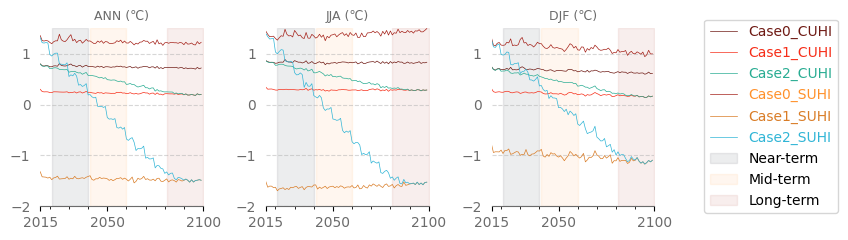

In [105]:
fig_1, axes = plt.subplots(nrows=1, ncols=4, figsize=(9, 2.5))
axes[3].remove()

axes[0].plot(time, Arr_CUHI_0, linewidth=linewidth,label='Case0_CUHI',color=lc1)
axes[1].plot(time, Arr_CUHI_0_JJA, linewidth=linewidth,label='Case0_CUHI_JJA',color=lc1)
axes[2].plot(time, Arr_CUHI_0_DJF, linewidth=linewidth,label='Case0_CUHI_DJF',color=lc1)

axes[0].plot(time, Arr_CUHI_1, linewidth=linewidth,label='Case1_CUHI',color=lc3)
axes[1].plot(time, Arr_CUHI_1_JJA, linewidth=linewidth,label='Case1_CUHI_JJA',color=lc3)
axes[2].plot(time, Arr_CUHI_1_DJF, linewidth=linewidth,label='Case1_CUHI_DJF',color=lc3)

axes[0].plot(time, Arr_CUHI_2, linewidth=linewidth,label='Case2_CUHI',color=lc7)
axes[1].plot(time, Arr_CUHI_2_JJA, linewidth=linewidth,label='Case2_CUHI_JJA',color=lc7)
axes[2].plot(time, Arr_CUHI_2_DJF, linewidth=linewidth,label='Case2_CUHI_DJF',color=lc7)

axes[0].plot(time, Arr_SUHI_0, linewidth=linewidth,label='Case0_SUHI',color=lc2)
axes[1].plot(time, Arr_SUHI_0_JJA, linewidth=linewidth,label='Case0_SUHI_JJA',color=lc2)
axes[2].plot(time, Arr_SUHI_0_DJF, linewidth=linewidth,label='Case0_SUHI_DJF',color=lc2)

axes[0].plot(time, Arr_SUHI_1, linewidth=linewidth,label='Case1_SUHI',color=lc4)
axes[1].plot(time, Arr_SUHI_1_JJA, linewidth=linewidth,label='Case1_SUHI_JJA',color=lc4)
axes[2].plot(time, Arr_SUHI_1_DJF, linewidth=linewidth,label='Case1_SUHI_DJF',color=lc4)

axes[0].plot(time, Arr_SUHI_2, linewidth=linewidth,label='Case2_SUHI',color=lc6)
axes[1].plot(time, Arr_SUHI_2_JJA, linewidth=linewidth,label='Case2_SUHI_JJA',color=lc6)
axes[2].plot(time, Arr_SUHI_2_DJF, linewidth=linewidth,label='Case2_SUHI_DJF',color=lc6)

axes[0].set_title('ANN (℃)',fontsize=fontsize,color=labelcolor)
axes[1].set_title('JJA (℃)',fontsize=fontsize,color=labelcolor)
axes[2].set_title('DJF (℃)',fontsize=fontsize,color=labelcolor)

ymin = -2
ymax = 1.5

for i in range(3):
        axes[i].set_xlim(start_year,2100)
        # axes[i].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        axes[i].ticklabel_format(style='sci', scilimits=(0,0), axis='y')
        axes[i].tick_params(axis='y', which='both', left=False, right=False, labelleft=True, labelcolor=labelcolor)
        axes[i].tick_params(axis='x', which='both', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor)
        # Hide the left, top, and right spines
        axes[i].spines['left'].set_visible(False)
        axes[i].spines['top'].set_visible(False)
        axes[i].spines['right'].set_visible(False)
        axes[i].spines['bottom'].set_color(labelcolor)
        axes[i].xaxis.set_minor_locator(minor_locator)
        axes[i].set_xticks(specific_years)
        axes[i].grid(True, which='major', axis='y',linestyle='--',linewidth=0.8, alpha=0.5)
        axes[i].set_ylim(ymin, ymax)
        axes[i].fill_betweenx([ymin, ymax],2021, 2040, color=lc9, alpha=alpha, label='Near-term')
        axes[i].fill_betweenx([ymin, ymax],2041, 2060, color=lc5, alpha=alpha, label='Mid-term')
        axes[i].fill_betweenx([ymin, ymax],2081, 2100, color=lc2, alpha=alpha, label='Long-term')

lines, labels = axes[0].get_legend_handles_labels()
legend = fig_1.legend(lines, labels,bbox_to_anchor=(0.78, 0.1), loc='lower left')

for i, text in enumerate(legend.get_texts()):
    if i == 0:
        text.set_color(lc1)
    elif i == 1:
        text.set_color(lc3)
    elif i == 2:
        text.set_color(lc7)
    elif i == 3:
        text.set_color(lc5)
    elif i == 4:
        text.set_color(lc4)
    elif i == 5:
        text.set_color(lc6)    
        
#fig_1.suptitle('UHI',x=0.005,ha='left',fontsize=fontsize)    
fig_1.tight_layout()
plt.show()
fig_1.savefig(path_fig+'UHI.png', dpi=300)

In [15]:
print (sum(Arr_CUHI_0) / len(Arr_CUHI_0))
print (sum(Arr_CUHI_1) / len(Arr_CUHI_1))

0.7425980378599728
0.22571468160432928


In [63]:
print (sum(Arr_SUHI_0) / len(Arr_SUHI_0))
print (sum(Arr_SUHI_1) / len(Arr_SUHI_1))

1.2332745762432322
-1.4635221859988043


In [64]:
print(Arr_CUHI_0[0])
print(Arr_CUHI_1[0])
print(Arr_CUHI_2[0])
print(Arr_CUHI_1[0]-Arr_CUHI_0[0])
print(Arr_CUHI_1[0]-Arr_CUHI_0[0])

0.8016961216926575
0.3003048300743103
0.795567512512207
-0.5013912916183472
-0.0061286091804504395


In [65]:
print(Arr_CUHI_0_JJA[0])
print(Arr_CUHI_1_JJA[0])
print(Arr_CUHI_2_JJA[0])
print(Arr_CUHI_1_JJA[0]-Arr_CUHI_0_JJA[0])
print(Arr_CUHI_2_JJA[0]-Arr_CUHI_0_JJA[0])

0.8652706742286682
0.3413443863391876
0.8586440086364746
-0.5239262878894806
-0.0066266655921936035


In [53]:
print(Arr_CUHI_0_DJF[0])
print(Arr_CUHI_1_DJF[0])
print(Arr_CUHI_2_DJF[0])
print(Arr_CUHI_1_DJF[0]-Arr_CUHI_0_DJF[0])
print(Arr_CUHI_2_DJF[0]-Arr_CUHI_0_DJF[0])

0.7485488653182983
0.313812255859375
0.7434537410736084
-0.43473660945892334
-0.005095124244689941


In [67]:
print(Arr_CUHI_0[84])
print(Arr_CUHI_1[84])
print(Arr_CUHI_2[84])
print(Arr_CUHI_1[84]-Arr_CUHI_0[84])
print(Arr_CUHI_2[84]-Arr_CUHI_0[84])

0.7202560305595398
0.20087334513664246
0.20092663168907166
-0.5193826854228973
-0.5193293988704681


In [68]:
print(Arr_CUHI_0_JJA[84])
print(Arr_CUHI_1_JJA[84])
print(Arr_CUHI_2_JJA[84])
print(Arr_CUHI_1_JJA[84]-Arr_CUHI_0_JJA[84])
print(Arr_CUHI_2_JJA[84]-Arr_CUHI_0_JJA[84])

0.8329976201057434
0.28709688782691956
0.28714290261268616
-0.5459007322788239
-0.5458547174930573


In [69]:
print(Arr_CUHI_0_DJF[84])
print(Arr_CUHI_1_DJF[84])
print(Arr_CUHI_2_DJF[84])
print(Arr_CUHI_1_DJF[84]-Arr_CUHI_0_DJF[84])
print(Arr_CUHI_2_DJF[84]-Arr_CUHI_0_DJF[84])

0.614091157913208
0.1659547984600067
0.1660144329071045
-0.4481363594532013
-0.4480767250061035


# UHS

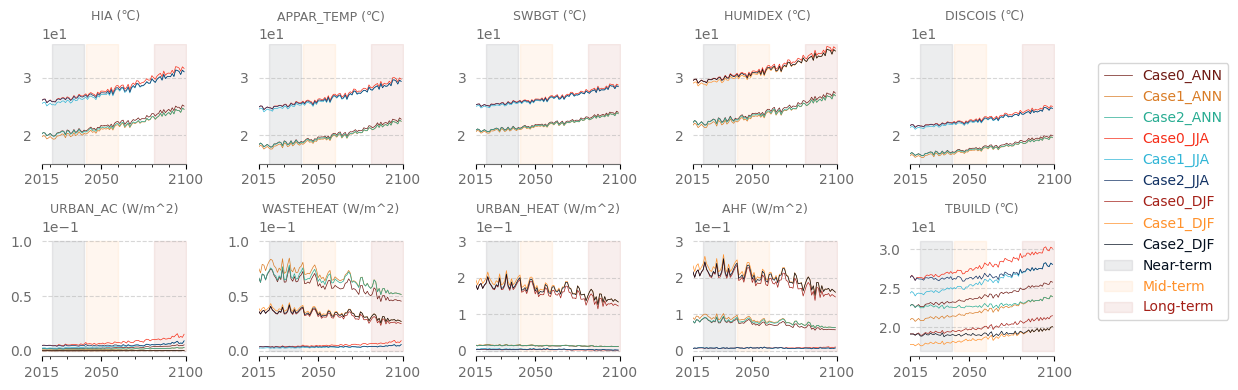

In [165]:
fig_2, axes = plt.subplots(nrows=2, ncols=6, figsize=(13, 4))
axes[0, 5].remove()
axes[1, 5].remove()

axes[0,0].plot(time, Arr_HIA_U_0, linewidth=linewidth,label='Case0_ANN',color=lc1)
axes[0,0].plot(time, Arr_HIA_U_1, linewidth=linewidth,label='Case1_ANN',color=lc4)
axes[0,0].plot(time, Arr_HIA_U_2, linewidth=linewidth,label='Case2_ANN',color=lc7)
axes[0,1].plot(time, Arr_APPAR_TEMP_U_0, linewidth=linewidth,label='Case0_APPAR_TEMP',color=lc1)
axes[0,1].plot(time, Arr_APPAR_TEMP_U_1, linewidth=linewidth,label='Case1_APPAR_TEMP',color=lc4)
axes[0,1].plot(time, Arr_APPAR_TEMP_U_2, linewidth=linewidth,label='Case2_APPAR_TEMP',color=lc7)
axes[0,2].plot(time, Arr_SWBGT_U_0, linewidth=linewidth,label='Case0_SWBGT',color=lc1)
axes[0,2].plot(time, Arr_SWBGT_U_1, linewidth=linewidth,label='Case1_SWBGT',color=lc4)
axes[0,2].plot(time, Arr_SWBGT_U_2, linewidth=linewidth,label='Case2_SWBGT',color=lc7)
axes[0,3].plot(time, Arr_HUMIDEX_U_0, linewidth=linewidth,label='Case0_HUMIDEX',color=lc1)
axes[0,3].plot(time, Arr_HUMIDEX_U_1, linewidth=linewidth,label='Case1_HUMIDEX',color=lc4)
axes[0,3].plot(time, Arr_HUMIDEX_U_2, linewidth=linewidth,label='Case2_HUMIDEX',color=lc7)
axes[0,4].plot(time, Arr_DISCOIS_U_0, linewidth=linewidth,label='Case0_DISCOIS',color=lc1)
axes[0,4].plot(time, Arr_DISCOIS_U_1, linewidth=linewidth,label='Case1_DISCOIS',color=lc4)
axes[0,4].plot(time, Arr_DISCOIS_U_2, linewidth=linewidth,label='Case2_DISCOIS',color=lc7)

axes[0,0].plot(time, Arr_HIA_U_0_JJA, linewidth=linewidth,label='Case0_JJA',color=lc3)
axes[0,0].plot(time, Arr_HIA_U_1_JJA, linewidth=linewidth,label='Case1_JJA',color=lc6)
axes[0,0].plot(time, Arr_HIA_U_2_JJA, linewidth=linewidth,label='Case2_JJA',color=lc8)
axes[0,1].plot(time, Arr_APPAR_TEMP_U_0_JJA, linewidth=linewidth,label='Case0_APPAR_TEMP',color=lc3)
axes[0,1].plot(time, Arr_APPAR_TEMP_U_1_JJA, linewidth=linewidth,label='Case1_APPAR_TEMP',color=lc6)
axes[0,1].plot(time, Arr_APPAR_TEMP_U_2_JJA, linewidth=linewidth,label='Case2_APPAR_TEMP',color=lc8)
axes[0,2].plot(time, Arr_SWBGT_U_0_JJA, linewidth=linewidth,label='Case0_SWBGT',color=lc3)
axes[0,2].plot(time, Arr_SWBGT_U_1_JJA, linewidth=linewidth,label='Case1_SWBGT',color=lc6)
axes[0,2].plot(time, Arr_SWBGT_U_2_JJA, linewidth=linewidth,label='Case2_SWBGT',color=lc8)
axes[0,3].plot(time, Arr_HUMIDEX_U_0_JJA, linewidth=linewidth,label='Case0_HUMIDEX',color=lc3)
axes[0,3].plot(time, Arr_HUMIDEX_U_1_JJA, linewidth=linewidth,label='Case1_HUMIDEX',color=lc5)
axes[0,3].plot(time, Arr_HUMIDEX_U_2_JJA, linewidth=linewidth,label='Case2_HUMIDEX',color=lc9)
axes[0,4].plot(time, Arr_DISCOIS_U_0_JJA, linewidth=linewidth,label='Case0_DISCOIS',color=lc3)
axes[0,4].plot(time, Arr_DISCOIS_U_1_JJA, linewidth=linewidth,label='Case1_DISCOIS',color=lc6)
axes[0,4].plot(time, Arr_DISCOIS_U_2_JJA, linewidth=linewidth,label='Case2_DISCOIS',color=lc8)

Arr_TBUILD_0_C = [value - 273.15 for value in Arr_TBUILD_0]
Arr_TBUILD_1_C = [value - 273.15 for value in Arr_TBUILD_1]
Arr_TBUILD_2_C = [value - 273.15 for value in Arr_TBUILD_2]
Arr_TBUILD_0_JJA_C = [value - 273.15 for value in Arr_TBUILD_0_JJA]
Arr_TBUILD_1_JJA_C = [value - 273.15 for value in Arr_TBUILD_1_JJA]
Arr_TBUILD_2_JJA_C = [value - 273.15 for value in Arr_TBUILD_2_JJA]
Arr_TBUILD_0_DJF_C = [value - 273.15 for value in Arr_TBUILD_0_DJF]
Arr_TBUILD_1_DJF_C = [value - 273.15 for value in Arr_TBUILD_1_DJF]
Arr_TBUILD_2_DJF_C = [value - 273.15 for value in Arr_TBUILD_2_DJF]

axes[1,0].plot(time, Arr_URBAN_AC_0, linewidth=linewidth,label='Case0_ANN',color=lc1)
axes[1,0].plot(time, Arr_URBAN_AC_1, linewidth=linewidth,label='Case1_ANN',color=lc4)
axes[1,0].plot(time, Arr_URBAN_AC_2, linewidth=linewidth,label='Case2_ANN',color=lc7)
axes[1,1].plot(time, Arr_URBAN_HEAT_0, linewidth=linewidth,label='Case0_URBAN_HEAT',color=lc1)
axes[1,1].plot(time, Arr_URBAN_HEAT_1, linewidth=linewidth,label='Case1_URBAN_HEAT',color=lc4)
axes[1,1].plot(time, Arr_URBAN_HEAT_2, linewidth=linewidth,label='Case2_URBAN_HEAT',color=lc7)
axes[1,2].plot(time, Arr_WASTEHEAT_0, linewidth=linewidth,label='Case0_WASTEHEAT',color=lc1)
axes[1,2].plot(time, Arr_WASTEHEAT_1, linewidth=linewidth,label='Case1_WASTEHEAT',color=lc4)
axes[1,2].plot(time, Arr_WASTEHEAT_2, linewidth=linewidth,label='Case2_WASTEHEAT',color=lc7)
axes[1,3].plot(time, Arr_AHF_0, linewidth=linewidth,label='Case0_AHF',color=lc1)
axes[1,3].plot(time, Arr_AHF_1, linewidth=linewidth,label='Case1_AHF',color=lc4)
axes[1,3].plot(time, Arr_AHF_2, linewidth=linewidth,label='Case2_AHF',color=lc7)
axes[1,4].plot(time, Arr_TBUILD_0_C, linewidth=linewidth,label='Case0_TBUILD',color=lc1)
axes[1,4].plot(time, Arr_TBUILD_1_C, linewidth=linewidth,label='Case1_TBUILD',color=lc4)
axes[1,4].plot(time, Arr_TBUILD_2_C, linewidth=linewidth,label='Case2_TBUILD',color=lc7)

axes[1,0].plot(time, Arr_URBAN_AC_0_JJA, linewidth=linewidth,label='Case0_JJA',color=lc3)
axes[1,0].plot(time, Arr_URBAN_AC_1_JJA, linewidth=linewidth,label='Case1_JJA',color=lc6)
axes[1,0].plot(time, Arr_URBAN_AC_2_JJA, linewidth=linewidth,label='Case2_JJA',color=lc8)
axes[1,2].plot(time, Arr_URBAN_HEAT_0_JJA, linewidth=linewidth,label='Case0_URBAN_HEAT',color=lc3)
axes[1,2].plot(time, Arr_URBAN_HEAT_1_JJA, linewidth=linewidth,label='Case1_URBAN_HEAT',color=lc6)
axes[1,2].plot(time, Arr_URBAN_HEAT_2_JJA, linewidth=linewidth,label='Case2_URBAN_HEAT',color=lc8)
axes[1,1].plot(time, Arr_WASTEHEAT_0_JJA, linewidth=linewidth,label='Case0_WASTEHEAT',color=lc3)
axes[1,1].plot(time, Arr_WASTEHEAT_1_JJA, linewidth=linewidth,label='Case1_WASTEHEAT',color=lc6)
axes[1,1].plot(time, Arr_WASTEHEAT_2_JJA, linewidth=linewidth,label='Case2_WASTEHEAT',color=lc8)
axes[1,3].plot(time, Arr_AHF_0_JJA, linewidth=linewidth,label='Case1_AHF',color=lc3)
axes[1,3].plot(time, Arr_AHF_1_JJA, linewidth=linewidth,label='Case1_AHF',color=lc6)
axes[1,3].plot(time, Arr_AHF_2_JJA, linewidth=linewidth,label='Case2_AHF',color=lc8)
axes[1,4].plot(time, Arr_TBUILD_0_JJA_C, linewidth=linewidth,label='Case0_TBUILD',color=lc3)
axes[1,4].plot(time, Arr_TBUILD_1_JJA_C, linewidth=linewidth,label='Case1_TBUILD',color=lc6)
axes[1,4].plot(time, Arr_TBUILD_2_JJA_C, linewidth=linewidth,label='Case2_TBUILD',color=lc8)

axes[1,0].plot(time, Arr_URBAN_AC_0_DJF, linewidth=linewidth,label='Case0_DJF',color=lc2)
axes[1,0].plot(time, Arr_URBAN_AC_1_DJF, linewidth=linewidth,label='Case1_DJF',color=lc5)
axes[1,0].plot(time, Arr_URBAN_AC_2_DJF, linewidth=linewidth,label='Case2_DJF',color=lc9)
axes[1,2].plot(time, Arr_URBAN_HEAT_0_DJF, linewidth=linewidth,label='Case0_URBAN_HEAT',color=lc2)
axes[1,2].plot(time, Arr_URBAN_HEAT_1_DJF, linewidth=linewidth,label='Case1_URBAN_HEAT',color=lc5)
axes[1,2].plot(time, Arr_URBAN_HEAT_2_DJF, linewidth=linewidth,label='Case2_URBAN_HEAT',color=lc9)
axes[1,1].plot(time, Arr_WASTEHEAT_0_DJF, linewidth=linewidth,label='Case0_WASTEHEAT',color=lc2)
axes[1,1].plot(time, Arr_WASTEHEAT_1_DJF, linewidth=linewidth,label='Case1_WASTEHEAT',color=lc5)
axes[1,1].plot(time, Arr_WASTEHEAT_2_DJF, linewidth=linewidth,label='Case2_WASTEHEAT',color=lc9)
axes[1,3].plot(time, Arr_AHF_0_DJF, linewidth=linewidth,label='Case0_AHF',color=lc2)
axes[1,3].plot(time, Arr_AHF_1_DJF, linewidth=linewidth,label='Case1_AHF',color=lc5)
axes[1,3].plot(time, Arr_AHF_2_DJF, linewidth=linewidth,label='Case2_AHF',color=lc9)
axes[1,4].plot(time, Arr_TBUILD_0_DJF_C, linewidth=linewidth,label='Case0_TBUILD',color=lc2)
axes[1,4].plot(time, Arr_TBUILD_1_DJF_C, linewidth=linewidth,label='Case1_TBUILD',color=lc5)
axes[1,4].plot(time, Arr_TBUILD_2_DJF_C, linewidth=linewidth,label='Case2_TBUILD',color=lc9)

axes[0,0].set_title('      HIA (℃)     ',fontsize=fontsize,color=labelcolor)
axes[0,1].set_title(' APPAR_TEMP (℃) ',fontsize=fontsize,color=labelcolor)
axes[0,2].set_title('    SWBGT (℃)   ',fontsize=fontsize,color=labelcolor)
axes[0,3].set_title('   HUMIDEX (℃)  ',fontsize=fontsize,color=labelcolor)
axes[0,4].set_title('   DISCOIS (℃)  ',fontsize=fontsize,color=labelcolor)

axes[1,0].set_title('URBAN_AC (W/m^2)',fontsize=fontsize,color=labelcolor)
axes[1,2].set_title('URBAN_HEAT (W/m^2)',fontsize=fontsize,color=labelcolor)
axes[1,1].set_title('WASTEHEAT (W/m^2)',fontsize=fontsize,color=labelcolor)
axes[1,3].set_title('AHF (W/m^2)',fontsize=fontsize,color=labelcolor)
axes[1,4].set_title('   TBUILD (℃)   ',fontsize=fontsize,color=labelcolor)

ymin = 15.0
ymax = 36.0

for i in range(2):
    for j in range(5):
        axes[i,j].set_xlim(start_year,end_year)
        # axes[i].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        axes[i,j].ticklabel_format(style='sci', scilimits=(0,0), axis='y')
        axes[i,j].tick_params(axis='y', which='both', left=False, right=False, labelleft=True, labelcolor=labelcolor)
        axes[i,j].tick_params(axis='x', which='both', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor)
        # Hide the left, top, and right spines
        axes[i,j].spines['left'].set_visible(False)
        axes[i,j].spines['top'].set_visible(False)
        axes[i,j].spines['right'].set_visible(False)
        axes[i,j].spines['bottom'].set_color(labelcolor)
        axes[i,j].xaxis.set_minor_locator(minor_locator)
        axes[i,j].set_xticks(specific_years)
        axes[i,j].grid(True, which='major', axis='y',linestyle='--',linewidth=0.8, alpha=0.5)
        if i ==0:
            axes[i,j].set_ylim(ymin, ymax)
            axes[i,j].fill_betweenx([ymin, ymax],2021, 2040, color=lc9, alpha=alpha, label='Near-term')
            axes[i,j].fill_betweenx([ymin, ymax],2041, 2060, color=lc5, alpha=alpha, label='Mid-term')
            axes[i,j].fill_betweenx([ymin, ymax],2081, 2100, color=lc2, alpha=alpha, label='Long-term')
ymin2 = 0
ymax2 = 0.1

ymin3 = 17
ymax3 = 31

ymax4 = 0.3

axes[1,0].fill_betweenx([ymin2, ymax2],2021, 2040, color=lc9, alpha=alpha, label='Near-term')
axes[1,0].fill_betweenx([ymin2, ymax2],2041, 2060, color=lc5, alpha=alpha, label='Mid-term')
axes[1,0].fill_betweenx([ymin2, ymax2],2081, 2100, color=lc2, alpha=alpha, label='Long-term')

axes[1,2].fill_betweenx([ymin2, ymax4],2021, 2040, color=lc9, alpha=alpha, label='Near-term')
axes[1,2].fill_betweenx([ymin2, ymax4],2041, 2060, color=lc5, alpha=alpha, label='Mid-term')
axes[1,2].fill_betweenx([ymin2, ymax4],2081, 2100, color=lc2, alpha=alpha, label='Long-term')

axes[1,1].fill_betweenx([ymin2, ymax2],2021, 2040, color=lc9, alpha=alpha, label='Near-term')
axes[1,1].fill_betweenx([ymin2, ymax2],2041, 2060, color=lc5, alpha=alpha, label='Mid-term')
axes[1,1].fill_betweenx([ymin2, ymax2],2081, 2100, color=lc2, alpha=alpha, label='Long-term')

axes[1,3].fill_betweenx([ymin2, ymax4],2021, 2040, color=lc9, alpha=alpha, label='Near-term')
axes[1,3].fill_betweenx([ymin2, ymax4],2041, 2060, color=lc5, alpha=alpha, label='Mid-term')
axes[1,3].fill_betweenx([ymin2, ymax4],2081, 2100, color=lc2, alpha=alpha, label='Long-term')

axes[1,4].fill_betweenx([ymin3, ymax3],2021, 2040, color=lc9, alpha=alpha, label='Near-term')
axes[1,4].fill_betweenx([ymin3, ymax3],2041, 2060, color=lc5, alpha=alpha, label='Mid-term')
axes[1,4].fill_betweenx([ymin3, ymax3],2081, 2100, color=lc2, alpha=alpha, label='Long-term')

lines, labels = axes[1,0].get_legend_handles_labels()
legend = fig_2.legend(lines, labels,bbox_to_anchor=(0.85, 0.17), loc='lower left')

for i, text in enumerate(legend.get_texts()):
    if i == 0:
        text.set_color(lc1)
    elif i == 1:
        text.set_color(lc4)
    elif i == 2:
        text.set_color(lc7)
    elif i == 3:
        text.set_color(lc3)
    elif i == 4:
        text.set_color(lc6)
    elif i == 5:
        text.set_color(lc8)    
    elif i == 6:
        text.set_color(lc2)
    elif i == 7:
        text.set_color(lc5)
    elif i == 8:
        text.set_color(lc9)
    elif i == 9:
        text.set_color(lc9)
    elif i == 10:
        text.set_color(lc5)
    elif i == 11:
        text.set_color(lc2)
        
#fig_2.suptitle('UHI',x=0.005,ha='left',fontsize=fontsize)    
fig_2.tight_layout()
plt.show()
fig_2.savefig(path_fig+'UHS_AHF.png', dpi=300)

In [110]:
print(Arr_HIA_U_0[0] - Arr_HIA_U_1[0])
print(Arr_HIA_U_0[84] - Arr_HIA_U_1[84])

0.5383930206298828


In [114]:
print (sum(Arr_HIA_U_0) / len(Arr_HIA_U_0) - sum(Arr_HIA_U_1) / len(Arr_HIA_U_1))
print (sum(Arr_APPAR_TEMP_U_0) / len(Arr_APPAR_TEMP_U_0) - sum(Arr_APPAR_TEMP_U_1) / len(Arr_APPAR_TEMP_U_1))
print (sum(Arr_SWBGT_U_0) / len(Arr_SWBGT_U_0) - sum(Arr_SWBGT_U_1) / len(Arr_SWBGT_U_1))
print (sum(Arr_HUMIDEX_U_0) / len(Arr_HUMIDEX_U_0) - sum(Arr_HUMIDEX_U_1) / len(Arr_HUMIDEX_U_1))
print (sum(Arr_DISCOIS_U_0) / len(Arr_DISCOIS_U_0) - sum(Arr_DISCOIS_U_1) / len(Arr_DISCOIS_U_1))

0.5556431938620143
0.37317195219151955
0.2572644177605099
0.4659410813275535
0.33436409445370074


In [176]:
print(Arr_TBUILD_0_JJA_C[84])
print(Arr_TBUILD_0_JJA_C[84]-Arr_TBUILD_0_JJA_C[0])
print(Arr_TBUILD_0_JJA_C[84]-Arr_TBUILD_1_JJA_C[84])
print(Arr_TBUILD_0_JJA_C[0]-Arr_TBUILD_1_JJA_C[0])

30.119012451171898
3.703277587890625
2.05859375
2.035125732421875


In [174]:
print(Arr_URBAN_AC_0_JJA[0])
print(Arr_URBAN_AC_0_JJA[84])
print(Arr_URBAN_AC_1_JJA[0])
print(Arr_URBAN_AC_1_JJA[84])
print((Arr_URBAN_AC_0_JJA[84]-Arr_URBAN_AC_1_JJA[84])/Arr_URBAN_AC_0_JJA[84])

0.004981338512152433
0.015185198746621609
0.00246609840542078
0.009090178646147251
0.40137901401062487
